In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Airbnb_Open_Data.csv')
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [4]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
data['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

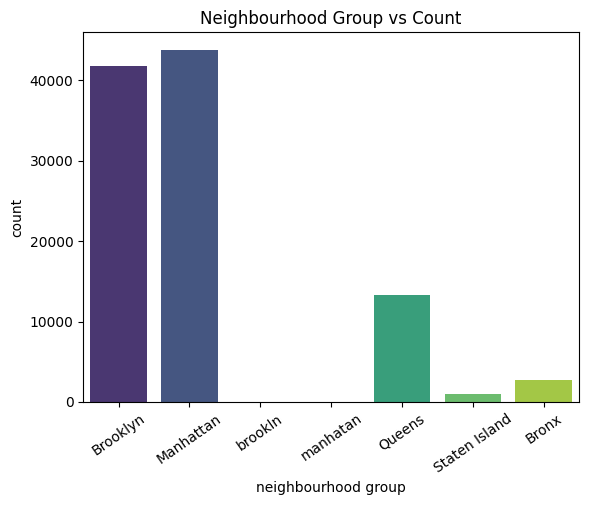

In [6]:
plt.xlabel('Neighbourhood group')
plt.xticks(rotation=35)
plt.ylabel('Count')
sns.countplot(x=data['neighbourhood group'],palette='viridis')
plt.title('Neighbourhood Group vs Count')
plt.show()

In [39]:
data['neighbourhood group']=data['neighbourhood group'].replace({'brookln':'Brooklyn','manhatan':'Manhattan'})

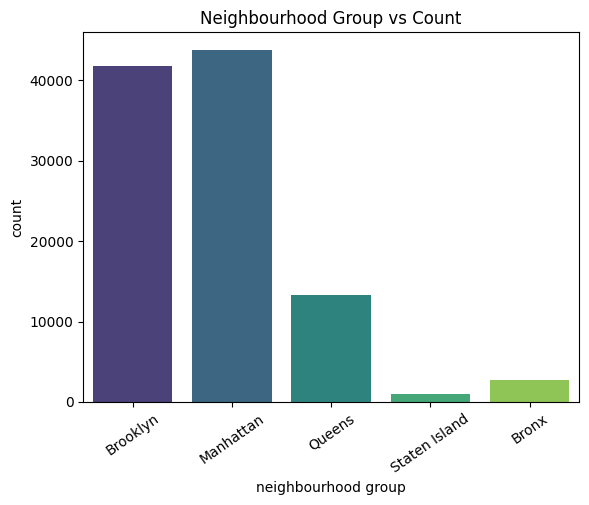

In [40]:
plt.xlabel('Neighbourhood group')
plt.xticks(rotation=35)
plt.ylabel('Count')
sns.countplot(x=data['neighbourhood group'],palette='viridis')
plt.title('Neighbourhood Group vs Count')
plt.show()

In [7]:
max_listings=max(data['calculated host listings count'])
max_listings

332.0

In [8]:
top_host = data[data['calculated host listings count']== max_listings].head(1)
print("The host with the maximum number of listings",top_host[['host id','host name']])

The host with the maximum number of listings            host id   host name
57424  76431087156  Blueground


In [9]:
print("The number of unique hosts are:",len(data['host id'].unique()))

The number of unique hosts are: 102057


In [10]:
data=data.drop(['host id'],axis=1)
data.head(3)

,id,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [11]:
data=data.drop(['id'],axis=1)

In [12]:
data['room type'].value_counts()

Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: room type, dtype: int64

<Axes: title={'center': 'Room Types'}, xlabel='room type', ylabel='count'>

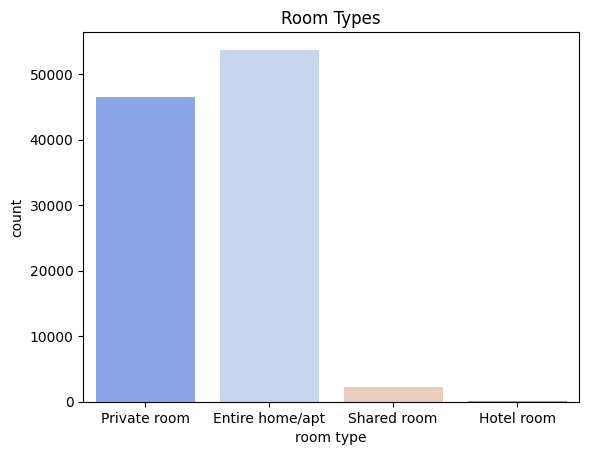

In [13]:

plt.title("Room Types")
sns.countplot(x=data['room type'],palette='coolwarm')

<Axes: xlabel='room type', ylabel='availability 365'>

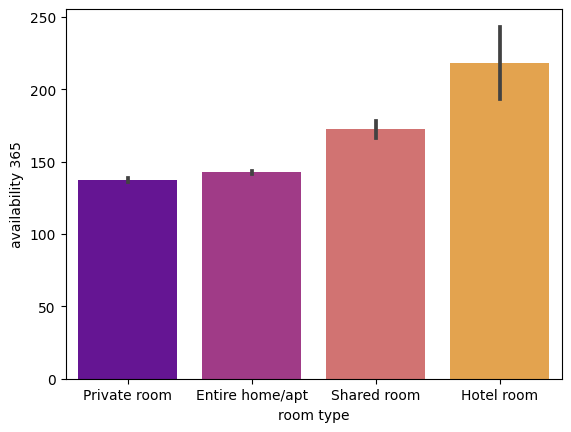

In [14]:
sns.barplot(x=data['room type'],y=data['availability 365'],palette='plasma')

In [15]:
data['price'].head()

0    $966 
1    $142 
2    $620 
3    $368 
4    $204 
Name: price, dtype: object

In [16]:
data['price'].isna().sum()

247

In [17]:
data['price']=data['price'].fillna(0)#inplace=True
data['price'].dtypes
#data['price']=data['price'].astype(int)

dtype('O')

In [18]:
data['instant_bookable'].unique()

array([False, True, nan], dtype=object)

<Axes: xlabel='instant_bookable', ylabel='count'>

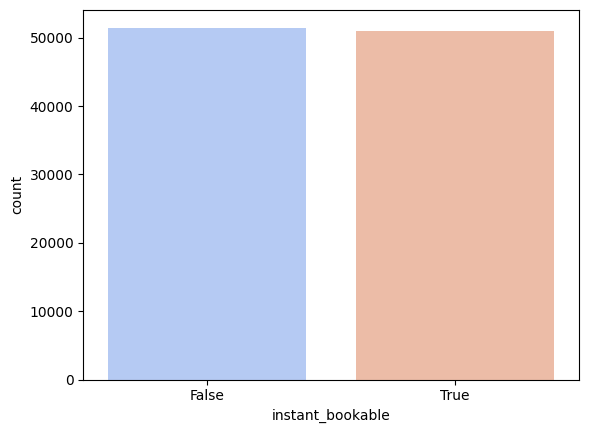

In [19]:
sns.countplot(x=data['instant_bookable'],palette='coolwarm')

<Axes: xlabel='cancellation_policy', ylabel='count'>

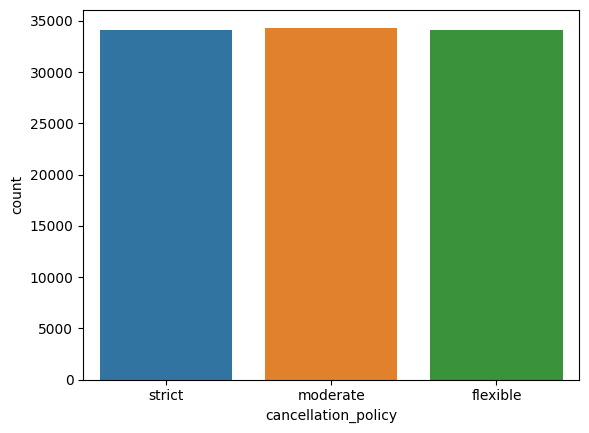

In [20]:
sns.countplot(x=data['cancellation_policy'])

<Axes: xlabel='Construction year', ylabel='count'>

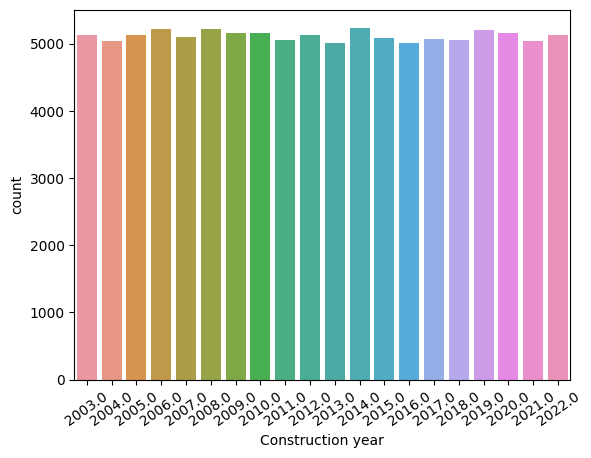

In [21]:
plt.xticks(rotation=35)
sns.countplot(x=data['Construction year'])

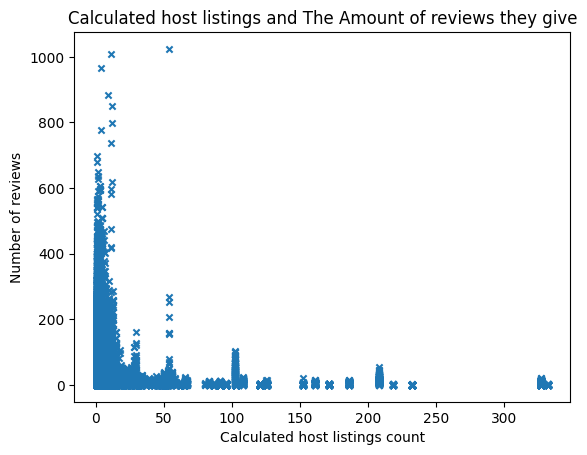

In [22]:
plt.xlabel('Calculated host listings count')
plt.ylabel('Number of reviews')
plt.title('Calculated host listings and The Amount of reviews they give')
plt.scatter(x=data['calculated host listings count'],y=data['number of reviews'],marker='x',s=20)

In [23]:
# calculate the maximum number of listings per neighbourhood_group
max_number_neighbourhood = data['neighbourhood group'].value_counts()
print ('\n The neighbourhood group with maximum number of listings is', max_number_neighbourhood.head(1))


 The neighbourhood group with maximum number of listings is Manhattan    43792
Name: neighbourhood group, dtype: int64


<Axes: xlabel='neighbourhood group', ylabel='minimum nights'>

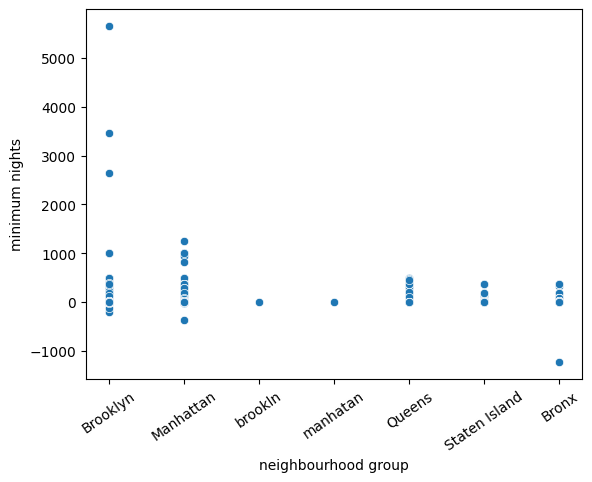

In [24]:
plt.xticks(rotation=35)
sns.scatterplot(x=data['neighbourhood group'],y=data['minimum nights'])

# Converting service fee into int data type

In [25]:
data1=data['service fee']
data1.isna().sum()
data1=data1.str.replace('[$,. ]','')
data1=data1.fillna(0)


In [26]:
data1=data1.astype(int)

In [27]:
data1.dtypes

dtype('int32')

<Axes: xlabel='service fee', ylabel='Count'>

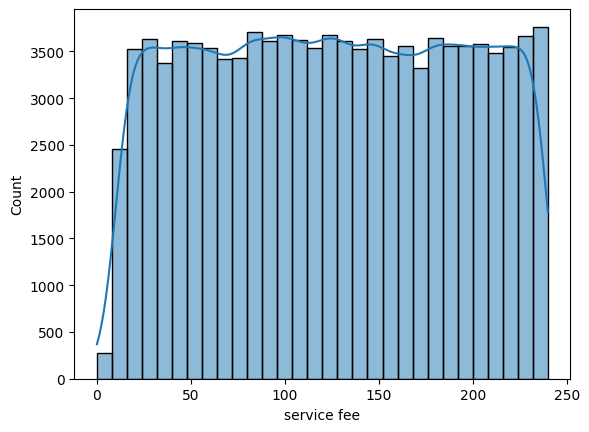

In [28]:
sns.histplot(x=data1,kde=True,bins=30)

# Converting price to int

In [29]:
data2=data['price']
data2.isna().sum()
data2=data2.str.replace('[$,. ]','')


In [30]:
data2.isnull().sum()

247

In [31]:
data2=pd.to_numeric(data2,errors='coerce')
data2.dtypes

dtype('float64')

In [32]:
data2=data2.dropna()

In [33]:
data2=data2.astype(int)

<Axes: xlabel='price', ylabel='Count'>

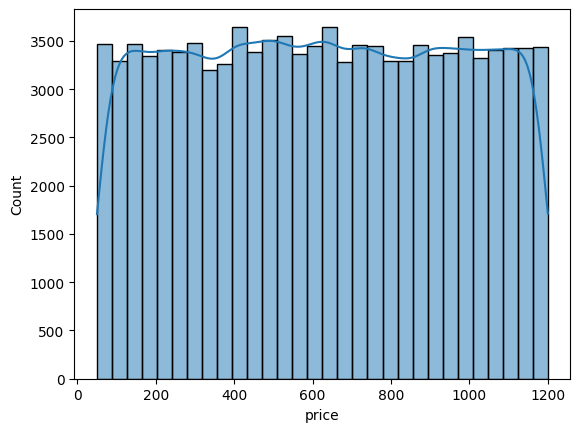

In [34]:
sns.histplot(x=data2,bins=30,kde=True)

<Axes: xlabel='host_identity_verified', ylabel='count'>

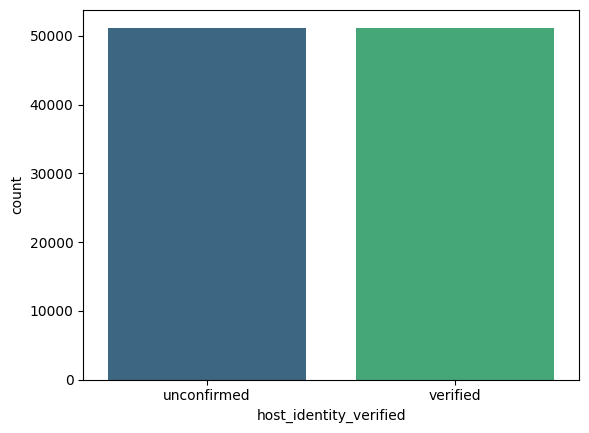

In [35]:
sns.countplot(x=data['host_identity_verified'],palette='viridis')

In [36]:
print('Unique license:',data['license'].value_counts())

Unique license: 41662/AL    2
Name: license, dtype: int64


Text(0.5, 1.0, 'Latitude Vs Longitude')

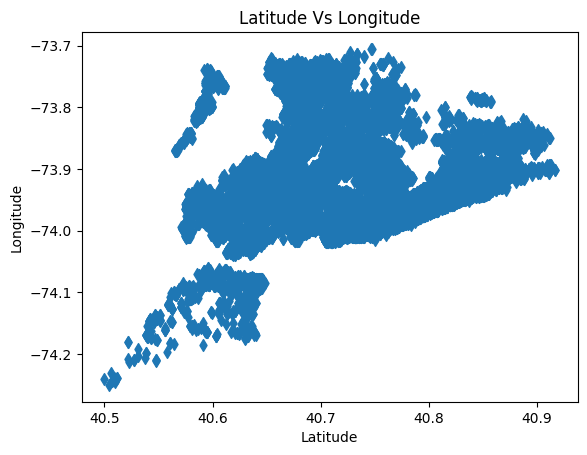

In [37]:
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(x=data['lat'],y=data['long'],cmap='coolwarm',marker='d')
plt.title('Latitude Vs Longitude')